In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("vendas_limpo.xlsx")


loja
Chuva Clara    181914.105903
Porto Sol      156122.988320
Vento Norte    173897.860717
Vila Neve      157194.134845
Name: valor_venda, dtype: float64


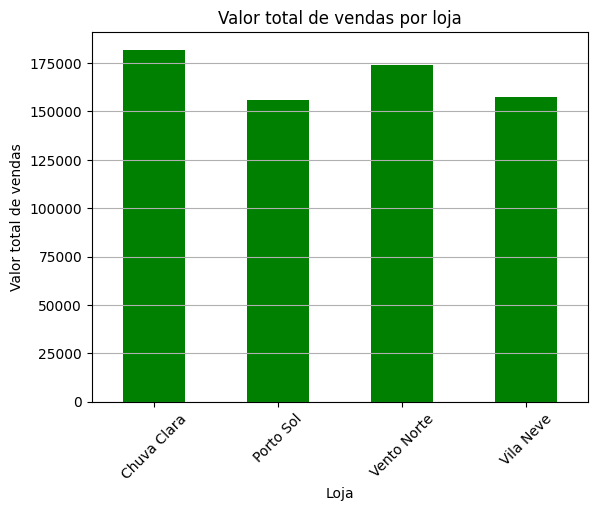

In [30]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
total_valor_vendas_loja = df.groupby('loja')['valor_venda'].sum()

print(total_valor_vendas_loja)

total_valor_vendas_loja.plot(kind='bar', color='green')
plt.title('Valor total de vendas por loja')
plt.xlabel('Loja')
plt.ylabel('Valor total de vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show() 

categoria    Eletrodomesticos      Infantil        Roupas       Sazonal
data_mensal                                                            
2024-01          10190.404000   9067.960000  20283.760000  23033.040000
2024-02           9990.460000  20101.840000   2779.515217  14663.875000
2024-03          15173.130000  15195.274688  20280.755000  23738.500552
2024-04          12315.336000   5890.580000  16621.937391  10284.330000
2024-05           4693.030000  12824.374000  20205.063913  16343.047273
2024-06          10896.410000  10313.333000  18484.910000  20455.658571
2024-07          10910.290000  12119.180000  18416.260000  12075.667500
2024-08          16296.610000  10124.543750   6971.170000  17276.085455
2024-09          18021.064000  22684.448387  16169.660000   6511.734286
2024-10           7132.030000  22920.616000   5908.760000  17408.874545
2024-11          12126.931575  12688.640000  13362.790000  24151.872500
2024-12           8958.189000  13063.940000  12559.210000   7443

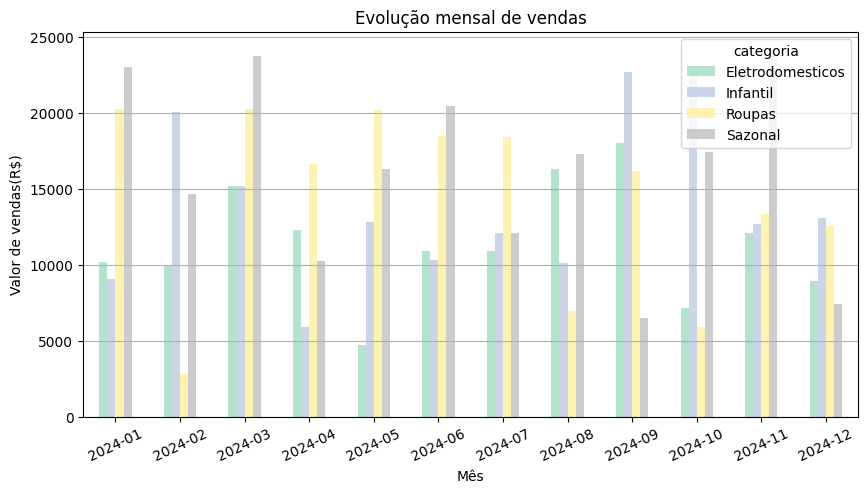

In [31]:
#2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.

df_analise = df
df_analise['data_mensal'] = df_analise['data'].dt.to_period('M')
tab_vendas_mensais = df.groupby(['data_mensal', 'categoria'])['valor_venda'].sum().unstack()
print(tab_vendas_mensais)


tab_vendas_mensais.plot(kind='bar', colormap='Pastel2', figsize=(10,5))
plt.title('Evolução mensal de vendas')
plt.xlabel('Mês')
plt.ylabel('Valor de vendas(R$)')
plt.xticks(rotation=25)
plt.grid(axis= 'y')
plt.show()

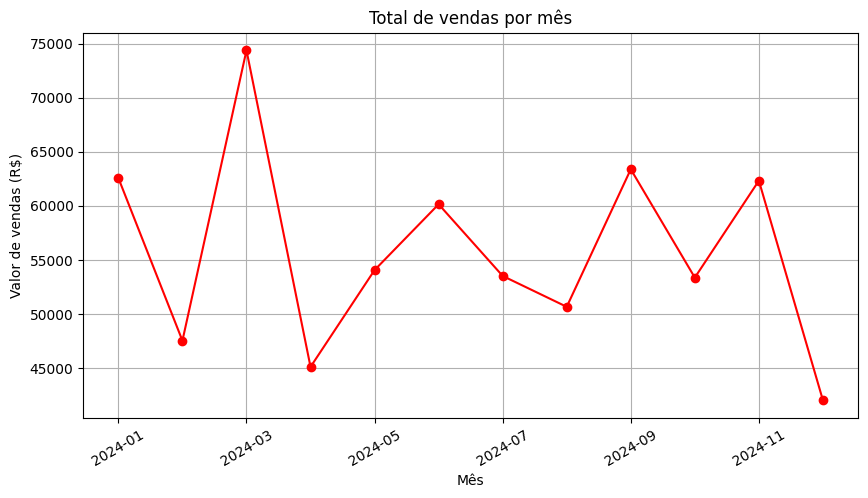

In [32]:
#3. Agrupar por mês e somar vendas
df_analise['data_mensal'] = df_analise['data'].dt.strftime('%Y-%m')  # Transforma em string

tab_vendas_mensais = df.groupby(['data_mensal'])['valor_venda'].sum()

tab_vendas_mensais.plot(kind='line',
                        figsize=(10, 5),
                        color='red',
                        marker='o')
plt.title('Total de vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Valor de vendas (R$)')
plt.xticks(rotation=30)
plt.grid(True)



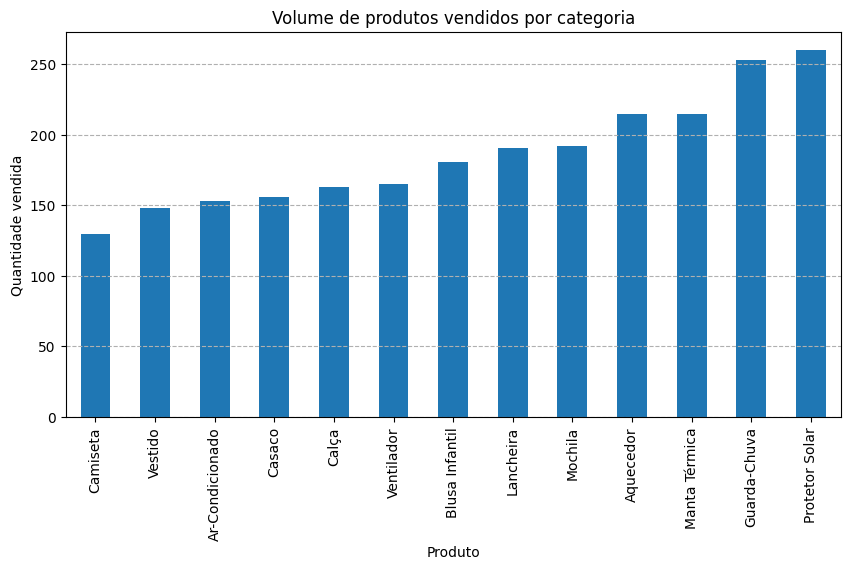

In [33]:
# 4. ixa.Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no ca
quantidade_produtos_vendidos = df.groupby('produto')['quantidade'].sum().sort_values()

quantidade_produtos_vendidos.plot(kind='bar', figsize=(10,5))
plt.title('Volume de produtos vendidos por categoria')
plt.ylabel('Quantidade vendida')
plt.xlabel('Produto')
plt.grid(axis='y', linestyle='--')
plt.show()

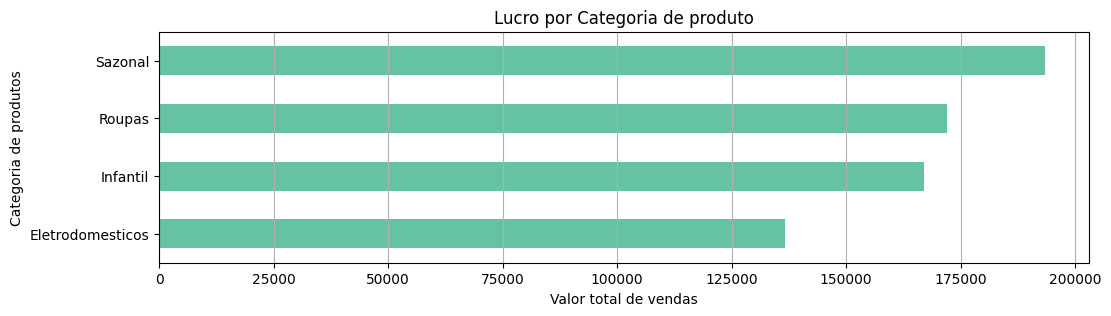

In [34]:
#5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
lucro_categoria = df.groupby('categoria')['valor_venda'].sum().sort_values()
lucro_categoria.plot(kind='barh', figsize=(12,3), colormap='Set2')
plt.title('Lucro por Categoria de produto')
plt.xlabel('Valor total de vendas')
plt.ylabel('Categoria de produtos')
plt.grid(axis='x', linestyle='-')
plt.show()

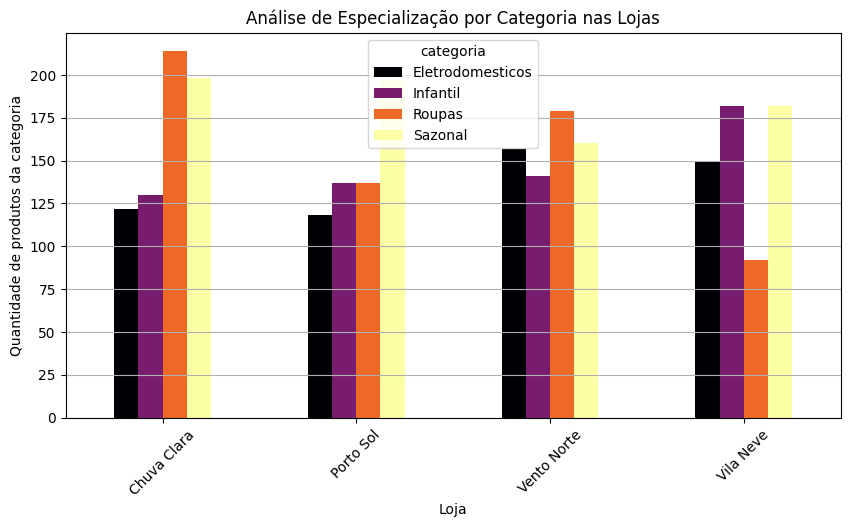

In [42]:
# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.

categoria_lojas = df.groupby(['loja', 'categoria'])['quantidade'].sum().unstack()
categoria_lojas.plot(kind='bar', figsize=(10, 5), colormap='inferno')
plt.title('Análise de Especialização por Categoria nas Lojas')
plt.xticks(rotation=45)
plt.xlabel('Loja')
plt.ylabel('Quantidade de produtos da categoria')
plt.grid(axis='y', linestyle='-')
plt.show()

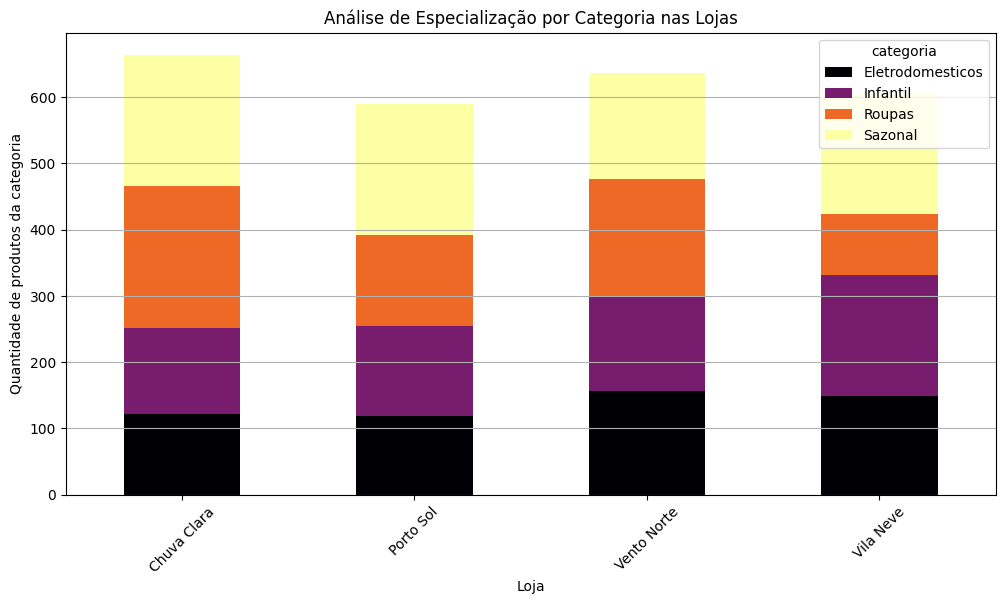

In [45]:
#7. # 7. Plotar como gráfico de barras empilhadas
categoria_lojas.plot(kind='bar', stacked=True, figsize=(12,6), colormap='inferno')
plt.title('Análise de Especialização por Categoria nas Lojas')
plt.ylabel('Quantidade de produtos da categoria')
plt.xticks(rotation=45)
plt.xlabel('Loja')
plt.ylabel('Quantidade de produtos da categoria')
plt.grid(axis='y', linestyle='-')
plt.show()